# Additive Decomposition

## Overview

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 500px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Time Series Decomposition (Additive)</th>
            <th>Input: Original Time Series</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/02_output.png">
            </td>
            <td>
                <img src="src/02_input.png">
            </td>
        </tr>
    </tbody>
</table>

## Data

In [1]:
import pandas as pd

df_passenger = pd.read_csv('../data/airline-passengers.csv', parse_dates=['Month'], index_col='Month')
df_passenger = df_passenger.asfreq('MS')
df_passenger

,Passengers
Month,
1949-01-01,112
1949-02-01,118
...,...
1960-11-01,390
1960-12-01,432


## Individual Components

- Trend (S)
- Seasonality (S)
- Residual or Irregular Component (I)

In [2]:
import statsmodels.api as sm 

data = df_passenger['Passengers'].values
result = sm.tsa.seasonal_decompose(data, model='additive', period=12)

df_component = (df_passenger
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid)
 .dropna())

df_component

,Passengers,trend,seasonal,residual
Month,,,,
1949-07-01,148,126.791667,63.830808,-42.622475
1949-08-01,148,127.250000,62.823232,-42.073232
...,...,...,...,...
1960-05-01,472,472.750000,-4.506313,3.756313
1960-06-01,535,475.041667,35.402778,24.555556


In [3]:
df_component['component_sum'] = df_component.trend + df_component.seasonal + df_component.residual
df_component

,Passengers,trend,seasonal,residual,component_sum
Month,,,,,
1949-07-01,148,126.791667,63.830808,-42.622475,148.0
1949-08-01,148,127.250000,62.823232,-42.073232,148.0
...,...,...,...,...,...
1960-05-01,472,472.750000,-4.506313,3.756313,472.0
1960-06-01,535,475.041667,35.402778,24.555556,535.0


## Additive Model

$y_t = T_t + S_t + e_t$

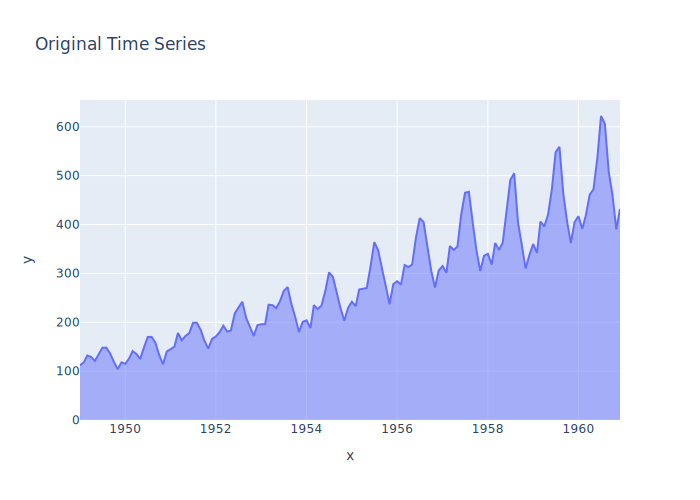

In [5]:
import plotly.express as px

fig = px.area(x=df_passenger.index, y=df_passenger['Passengers'], title='Original Time Series')
fig

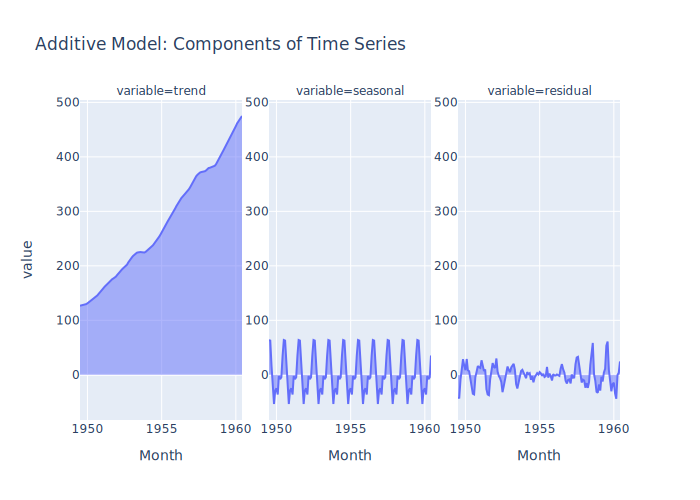

In [7]:
dff = df_component.melt(ignore_index=False)
dff = dff.query('~variable.isin(["Passengers", "component_sum"])')

fig = px.area(dff, x=dff.index, y='value', facet_col='variable', title='Additive Model: Components of Time Series', facet_col_spacing=0.05)

# Ensure y-axis tick labels are visible for all subplots
for axis in fig.layout:
    if 'yaxis' in axis:
        fig.layout[axis].showticklabels = True

fig